In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [47]:
plt.style.use('seaborn-whitegrid')

In [4]:
data = data.dropna(subset = ['fecha'])
data['fecha'] = pd.to_datetime(data['fecha'])
data['total'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float32
habitaciones                  217529 non-null float32
garages                       202235 non-null float32
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float32
lat                           116512 non-null float32
lng                           116512 non-null float32
fecha                         240

In [6]:
data.tipodepropiedad.unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', nan, 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

([<matplotlib.axis.XTick at 0x28d30ff0550>,
 <a list of 5 Text xticklabel objects>)

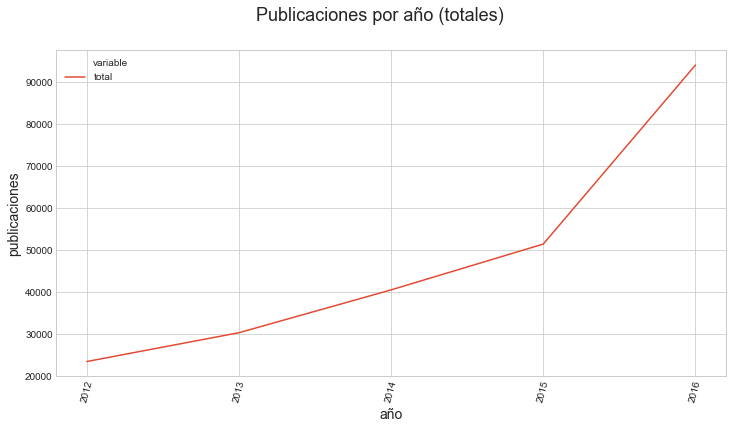

In [96]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio = por_anio.groupby('año').agg({'total':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = pd.melt(por_anio, ['año']), x = 'año', y = 'value', hue='variable',)
plt.xticks(rotation=75)
plt.suptitle('Publicaciones por año (totales)', fontsize=18)
plt.xlabel("año", fontsize = 14)
plt.ylabel("publicaciones", fontsize = 14)
plt.xticks((2012,2013,2014,2015,2016))

([<matplotlib.axis.XTick at 0x28d3ebf6320>,
 <a list of 5 Text xticklabel objects>)

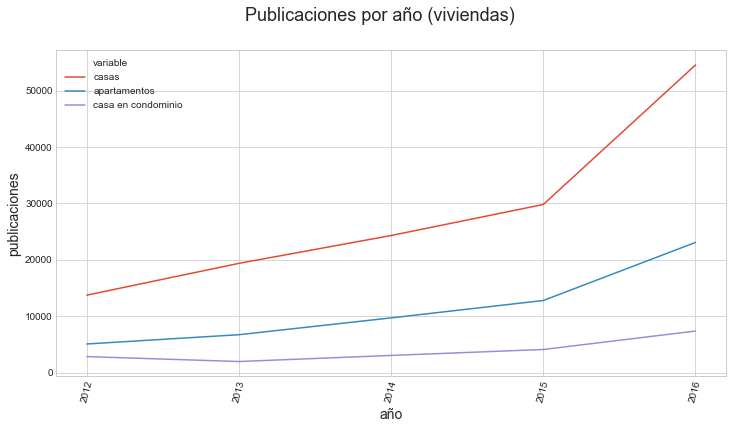

In [97]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio['casas'] = (data['tipodepropiedad'] == 'Casa')
por_anio['apartamentos'] = (data["tipodepropiedad"] == 'Apartamento')
por_anio['casa en condominio'] = (data["tipodepropiedad"] == 'Casa en condominio')
por_anio = por_anio.groupby('año').agg({'casas':'sum', 'apartamentos':'sum',\
                                        'casa en condominio':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = pd.melt(por_anio, ['año']), x = 'año', y = 'value', hue='variable',)
plt.xticks(rotation=75)
plt.suptitle('Publicaciones por año (viviendas)', fontsize=18)
plt.xlabel("año", fontsize = 14)
plt.ylabel("publicaciones", fontsize = 14)
plt.xticks((2012,2013,2014,2015,2016))

([<matplotlib.axis.XTick at 0x28d3ff6f668>,
 <a list of 5 Text xticklabel objects>)

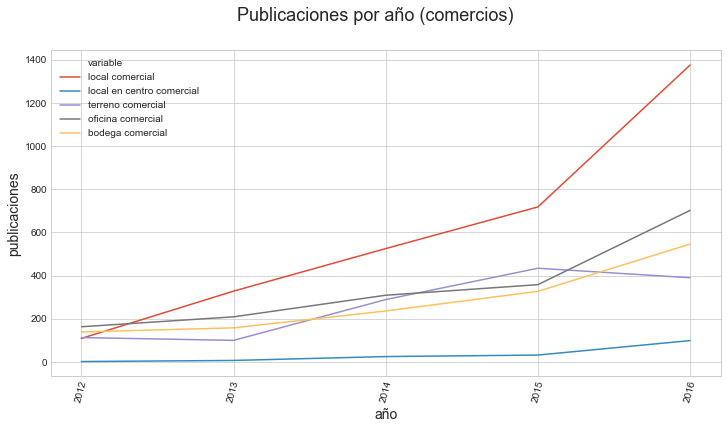

In [98]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio['local comercial'] = (data['tipodepropiedad'] == 'Local Comercial')
por_anio['terreno comercial'] = (data["tipodepropiedad"] == 'Terreno comercial')
por_anio['oficina comercial'] = (data["tipodepropiedad"] == 'Oficina comercial')
por_anio['local en centro comercial'] = (data["tipodepropiedad"] == 'Local en centro comercial')
por_anio['bodega comercial'] = (data["tipodepropiedad"] == 'Bodega comercial')
por_anio = por_anio.groupby('año').agg({ 'local comercial':'sum', 'local en centro comercial':'sum', \
                                        'terreno comercial':'sum', 'oficina comercial':'sum', \
                                        'bodega comercial':'sum'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = pd.melt(por_anio, ['año']), x = 'año', y = 'value', hue='variable',)
plt.xticks(rotation=75)
plt.suptitle('Publicaciones por año (comercios)', fontsize=18)
plt.xlabel("año", fontsize = 14)
plt.ylabel("publicaciones", fontsize = 14)
plt.xticks((2012,2013,2014,2015,2016))

([<matplotlib.axis.XTick at 0x28d3ffee358>,
 <a list of 5 Text xticklabel objects>)

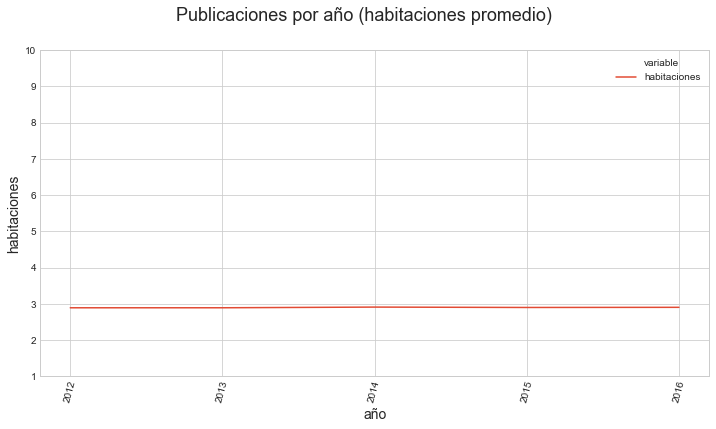

In [99]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio['habitaciones'] = data['habitaciones']
por_anio = por_anio.groupby('año').agg({'habitaciones':'mean'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = pd.melt(por_anio, ['año']), x = 'año', y = 'value', hue='variable',)
plt.xticks(rotation=75)
plt.suptitle('Publicaciones por año (habitaciones promedio)', fontsize=18)
plt.xlabel("año", fontsize = 14)
plt.ylabel("habitaciones", fontsize = 14)
ax.set(ylim=(data['habitaciones'].min(), data['habitaciones'].max()))
plt.xticks((2012,2013,2014,2015,2016))

In [59]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio['año'].unique()

array([2015, 2013, 2012, 2016, 2014], dtype=int64)

([<matplotlib.axis.XTick at 0x28d424f3240>,
 <a list of 12 Text xticklabel objects>)

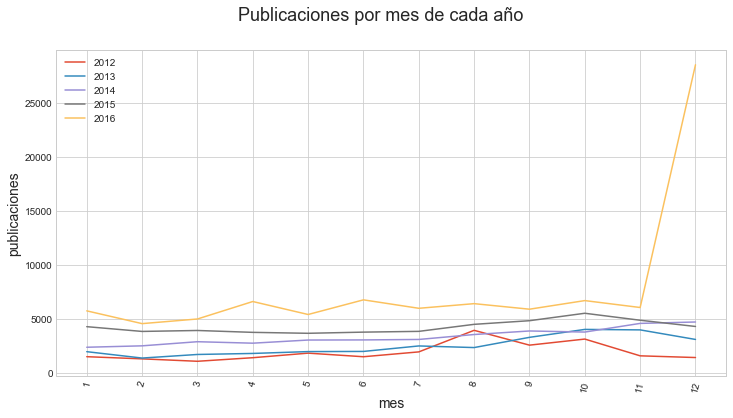

In [107]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio['mes'] = data['fecha'].apply(lambda x: x.month)
por_anio['2015'] = (por_anio['año'] == 2015)
por_anio['2016'] = (por_anio['año'] == 2016)
por_anio['2014'] = (por_anio['año'] == 2014)
por_anio['2013'] = (por_anio['año'] == 2013)
por_anio['2012'] = (por_anio['año'] == 2012)
por_anio = por_anio.groupby('mes').agg({ '2012':'sum', '2013':'sum', \
                                        '2014':'sum', '2015':'sum', \
                                        '2016':'sum'}).reset_index()
por_anio.set_index('mes', inplace=True)
ax = por_anio.plot.line(figsize=(12, 6))
plt.xticks(rotation=75)
plt.suptitle('Publicaciones por mes de cada año', fontsize=18)
plt.xlabel("mes", fontsize = 14)
plt.ylabel("publicaciones", fontsize = 14)
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))

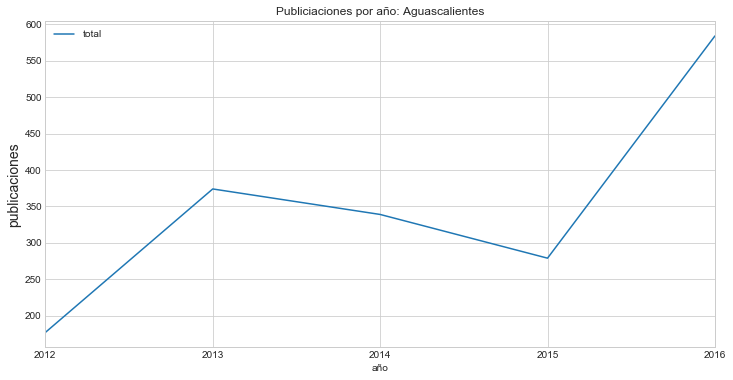

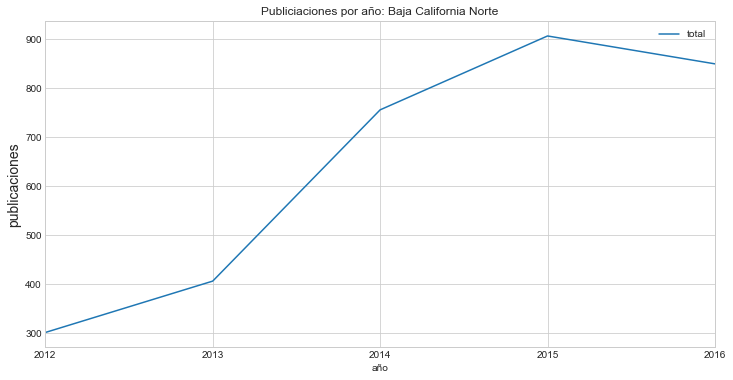

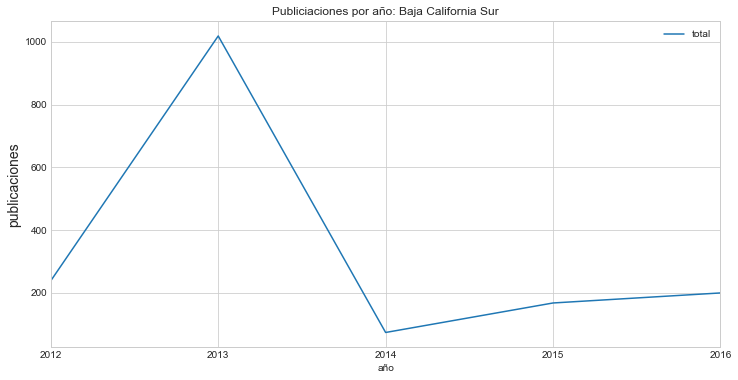

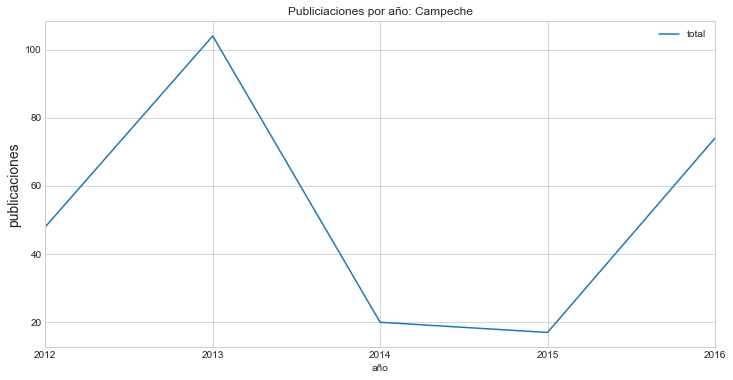

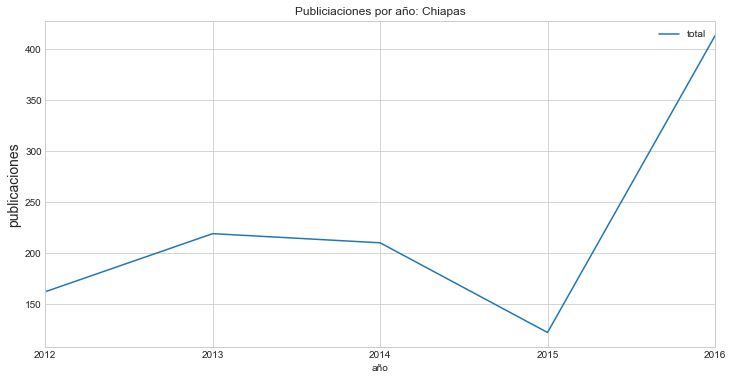

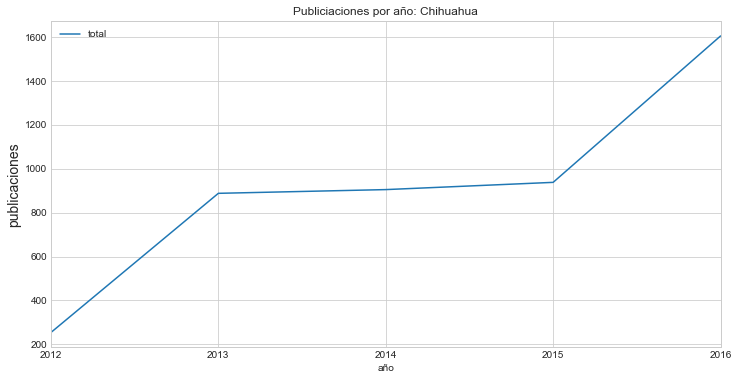

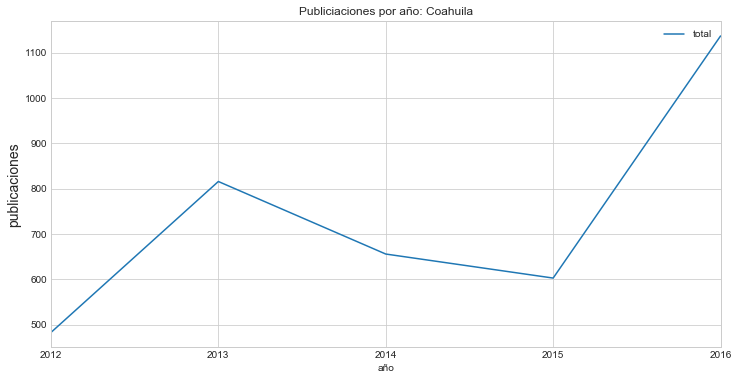

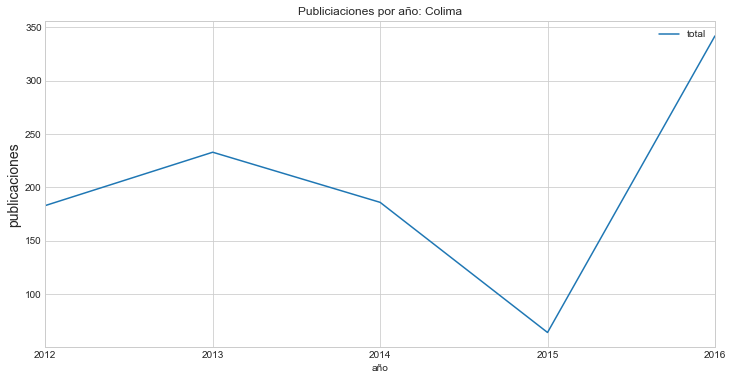

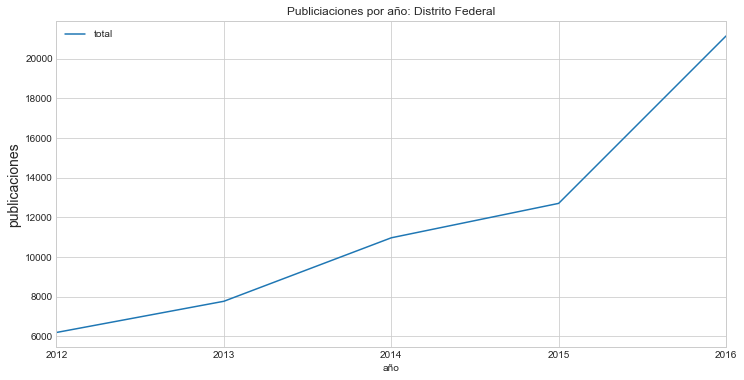

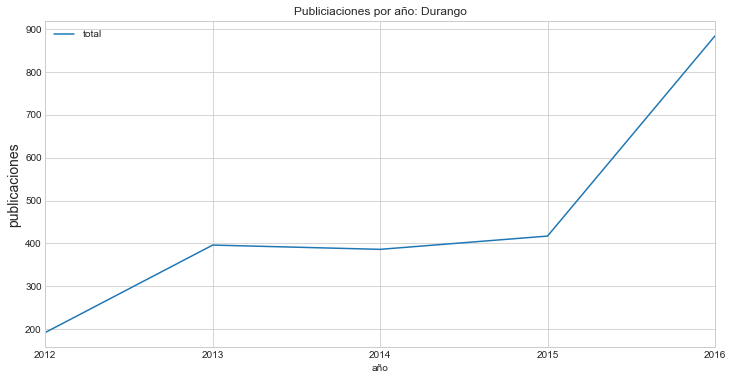

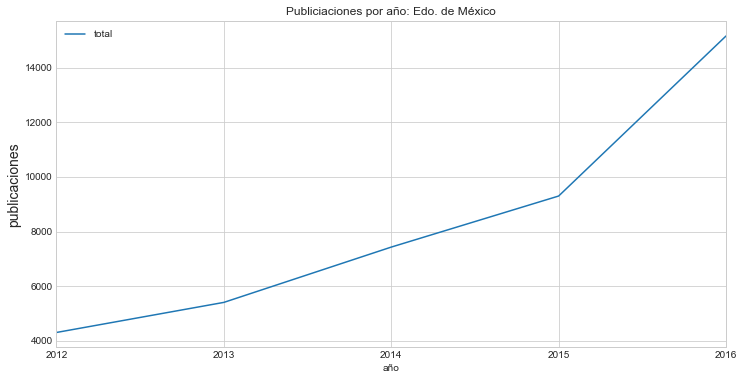

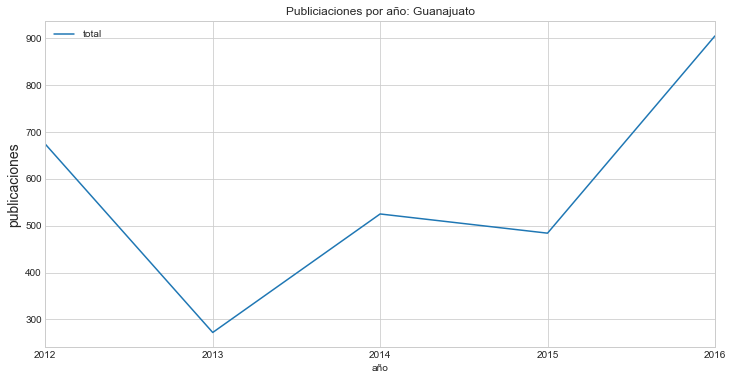

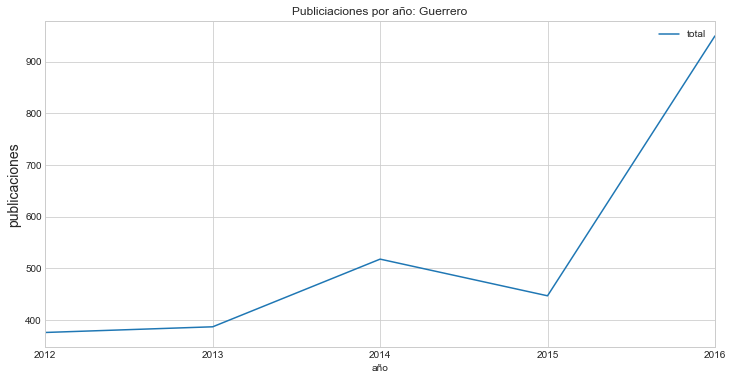

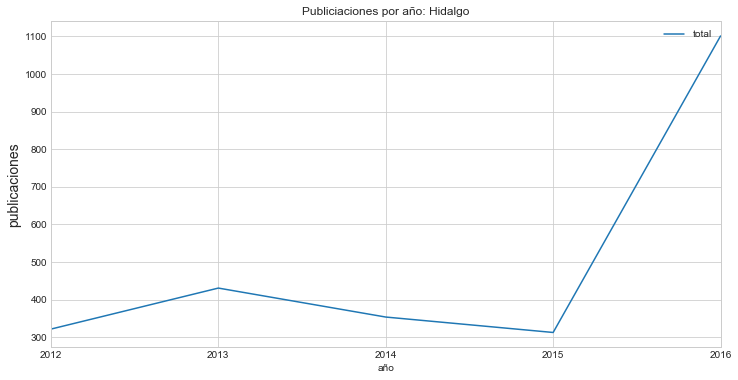

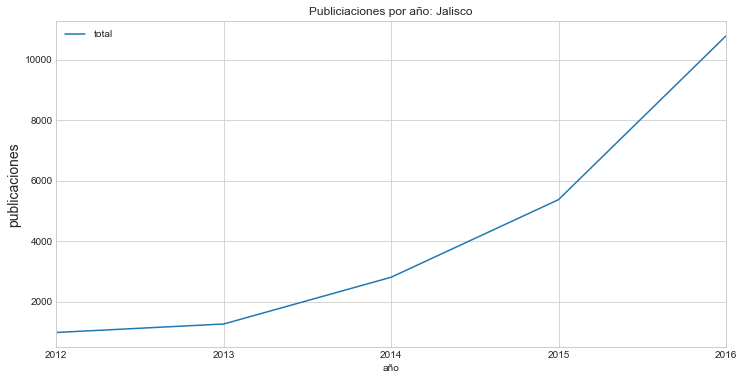

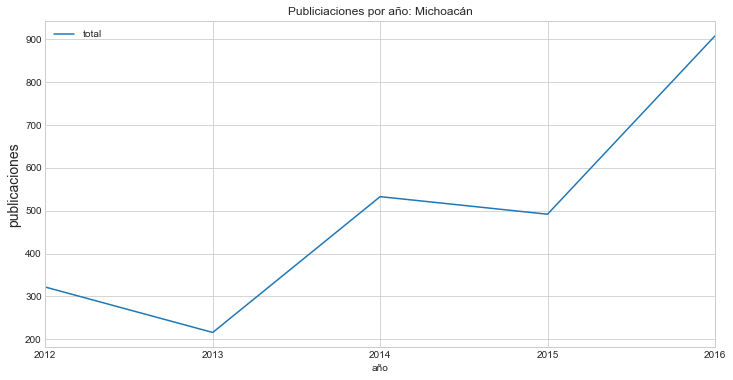

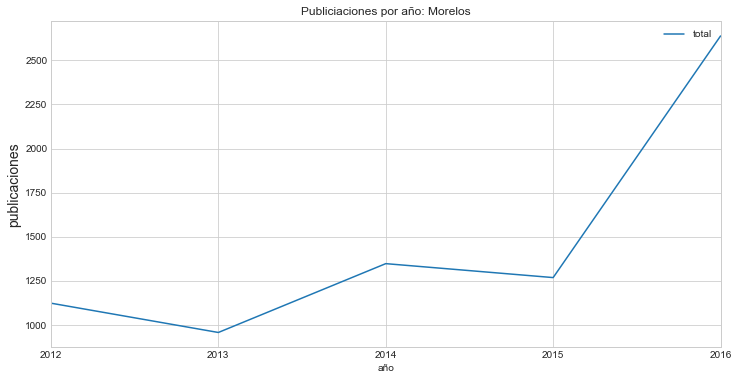

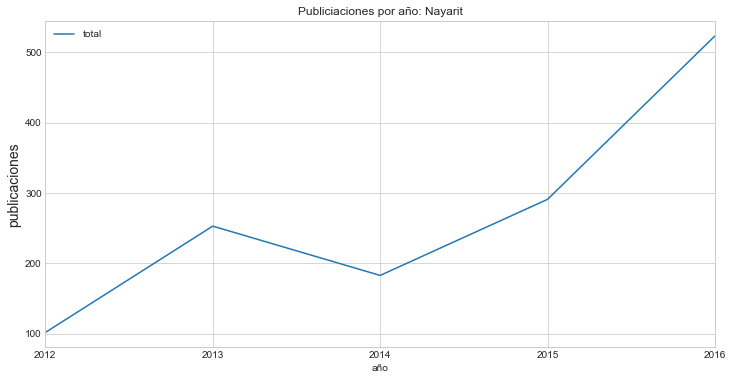

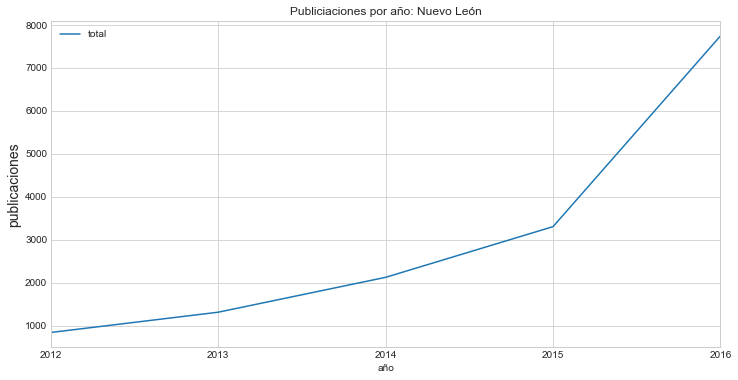

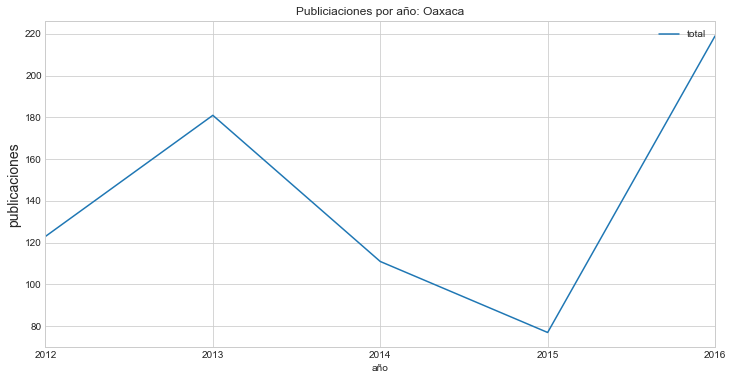

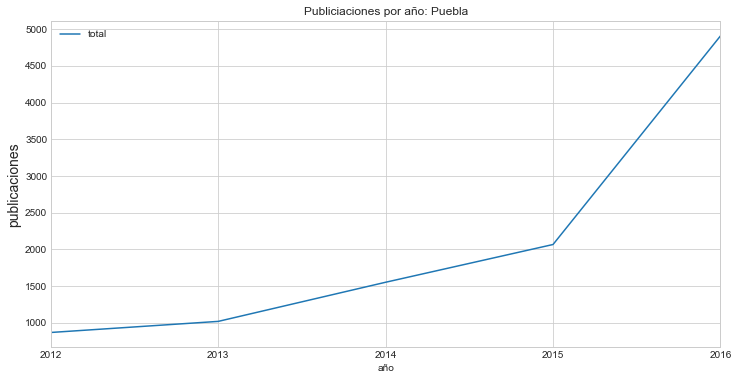

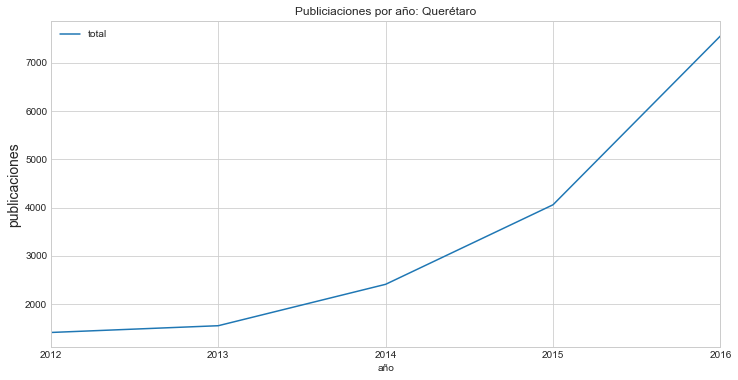

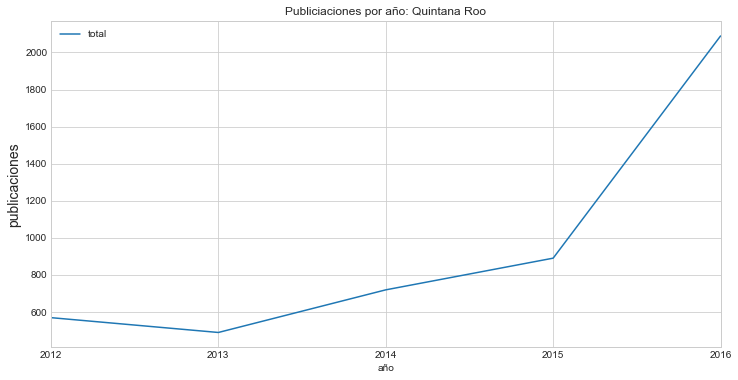

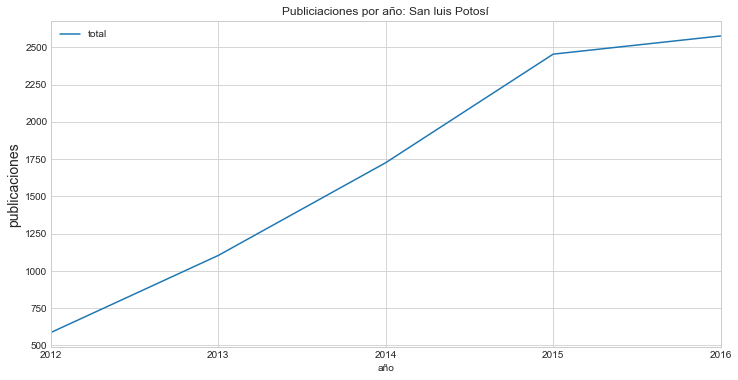

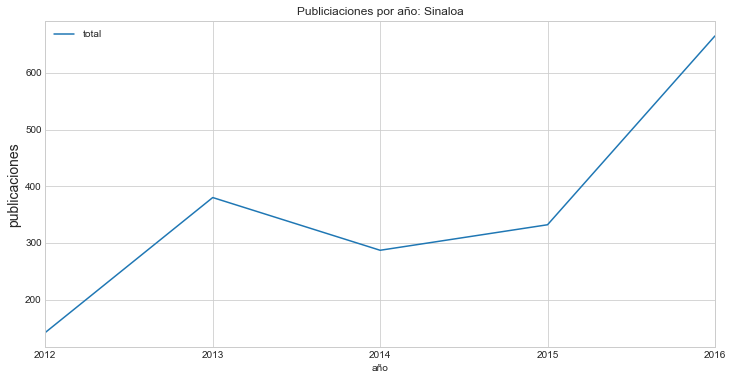

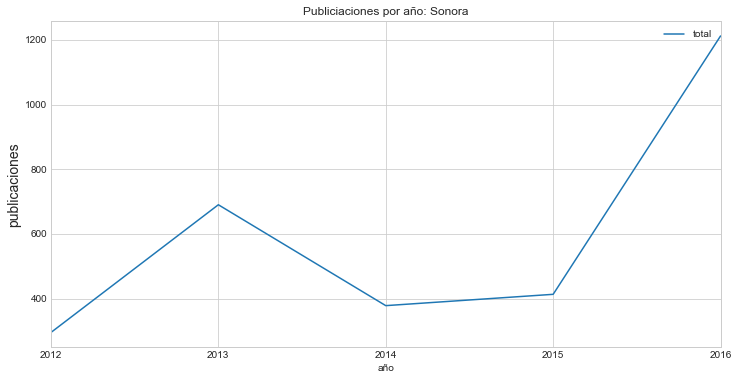

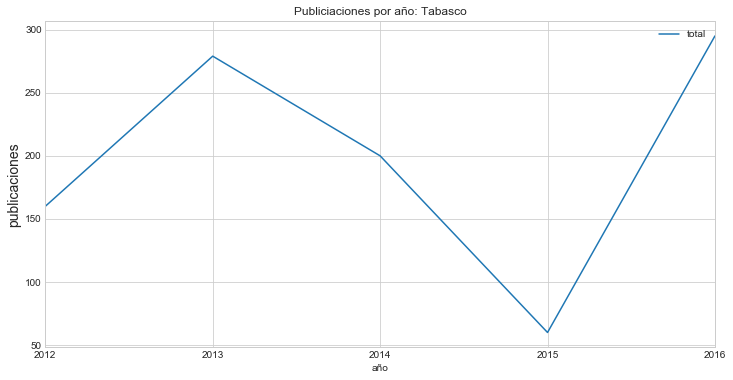

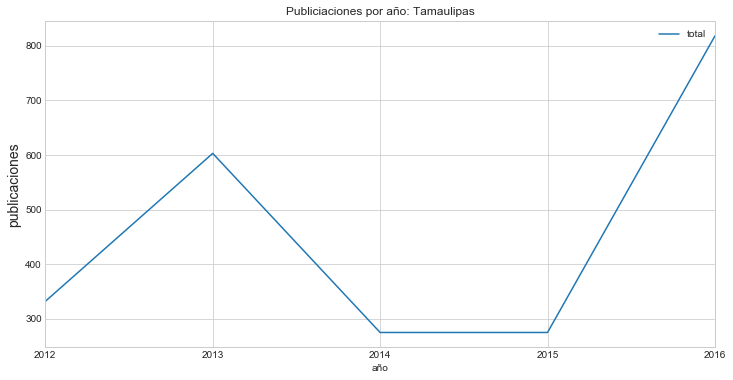

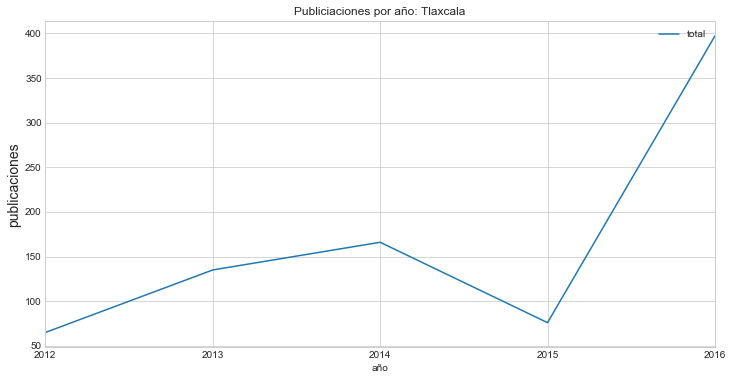

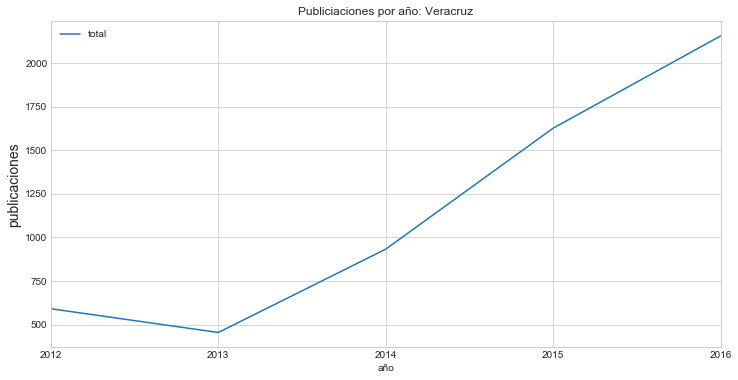

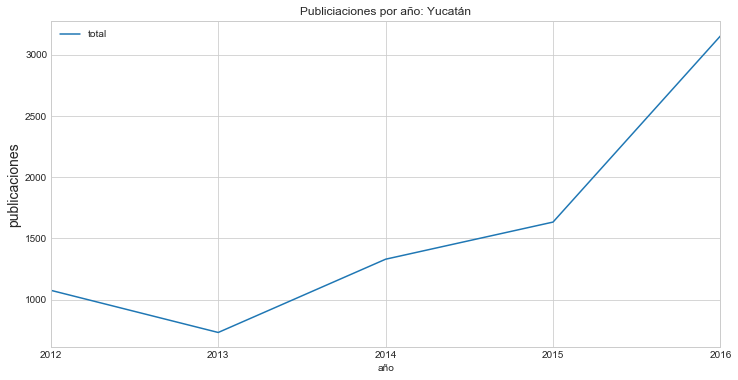

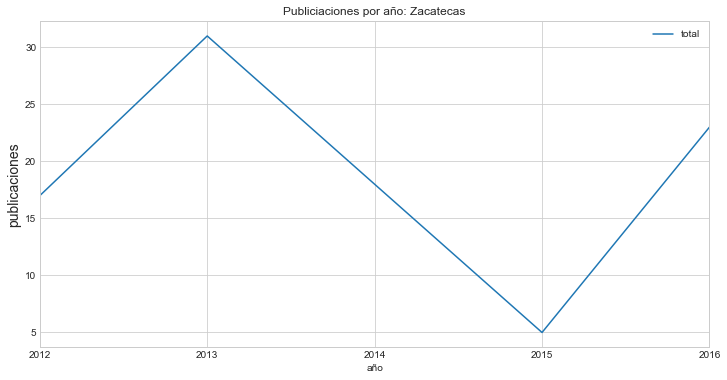

In [52]:
por_anio = data
por_anio['año'] = data['fecha'].apply(lambda x: x.year)
por_anio = por_anio.groupby(['año','provincia']).agg({ 'total':'sum'}).reset_index()

for provincia in por_anio['provincia'].unique():
    aux = por_anio[por_anio['provincia'] == provincia]
    aux.drop(['provincia'], axis = 1, inplace = True)
    aux.set_index('año', inplace = True)
    aux.plot.line(title = 'Publiciaciones por año: '+provincia, figsize=(12, 6))
    plt.ylabel("publicaciones", fontsize = 14)
    plt.xticks((2012,2013,2014,2015,2016))